# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | anna regina
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | novaya igirma
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | poli
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | sungai raya
Processing Record 21 of Set 1 | oamaru
Pro

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.74,55,12,5.83,PN,1712886345
1,port mathurin,-19.6833,63.4167,26.82,75,39,4.89,MU,1712886346
2,wailua homesteads,22.0669,-159.3780,23.24,87,100,0.00,US,1712886347
3,puerto natales,-51.7236,-72.4875,2.59,90,17,2.32,CL,1712886301
4,college,64.8569,-147.8028,7.18,49,75,6.17,US,1712886338


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.74,55,12,5.83,PN,1712886345
1,port mathurin,-19.6833,63.4167,26.82,75,39,4.89,MU,1712886346
2,wailua homesteads,22.0669,-159.3780,23.24,87,100,0.00,US,1712886347
3,puerto natales,-51.7236,-72.4875,2.59,90,17,2.32,CL,1712886301
4,college,64.8569,-147.8028,7.18,49,75,6.17,US,1712886338


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

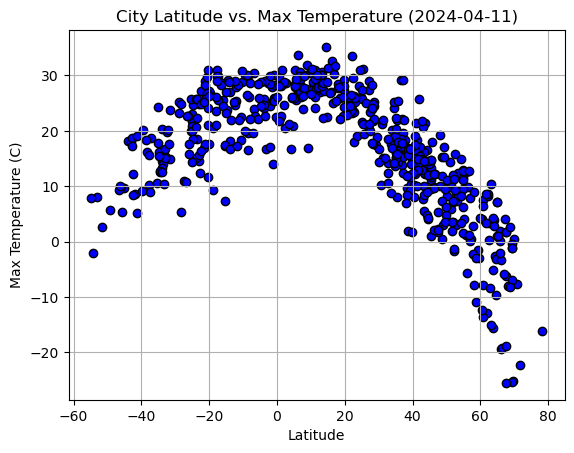

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolors= "blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-04-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

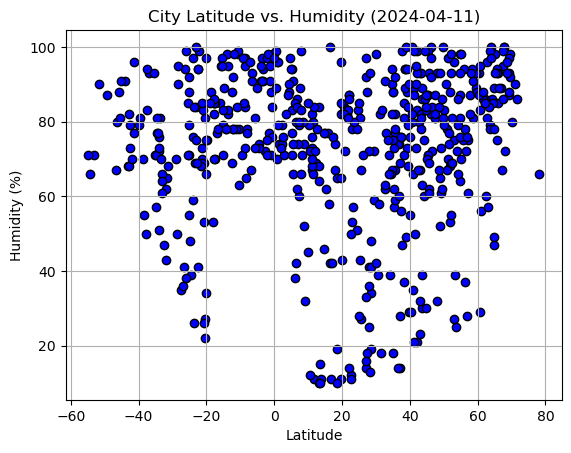

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolors= "blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

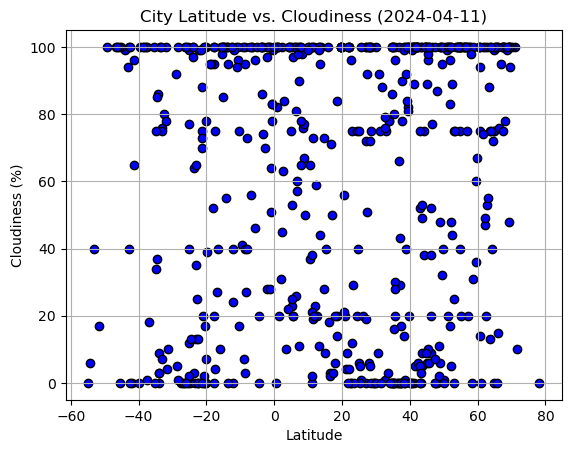

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolors= "blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

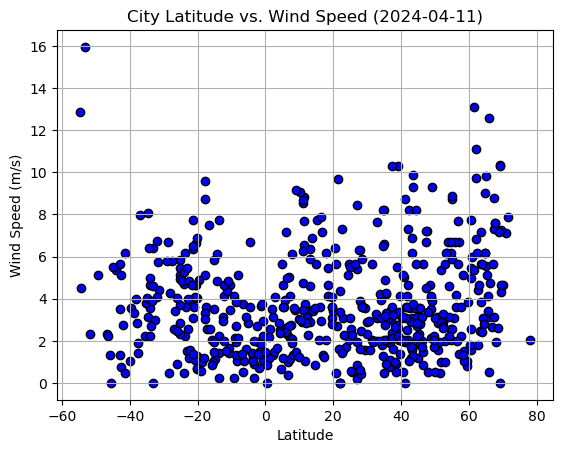

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolors= "blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def func(x,y,a,b):
    (slope, intercept, rval, pval, stderr) = linregress(x,y)

    plt. scatter(x,y)

    print(f"The r-value is: {rval}")
    
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_values = x * slope + intercept
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_eq, (a,b), color = "red")

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wailua homesteads,22.0669,-159.3780,23.24,87,100,0.00,US,1712886347
4,college,64.8569,-147.8028,7.18,49,75,6.17,US,1712886338
7,anna regina,7.2644,-58.5077,26.84,79,11,4.13,GY,1712886351
8,novaya igirma,57.1334,103.9112,0.49,75,100,1.36,RU,1712886352
11,utrik,11.2278,169.8474,26.59,73,100,8.56,MH,1712886355


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.74,55,12,5.83,PN,1712886345
1,port mathurin,-19.6833,63.4167,26.82,75,39,4.89,MU,1712886346
3,puerto natales,-51.7236,-72.4875,2.59,90,17,2.32,CL,1712886301
5,punta arenas,-53.1500,-70.9167,8.06,71,40,15.95,CL,1712886321
6,waitangi,-43.9535,-176.5597,18.23,91,99,5.36,NZ,1712886350


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8660183932509824


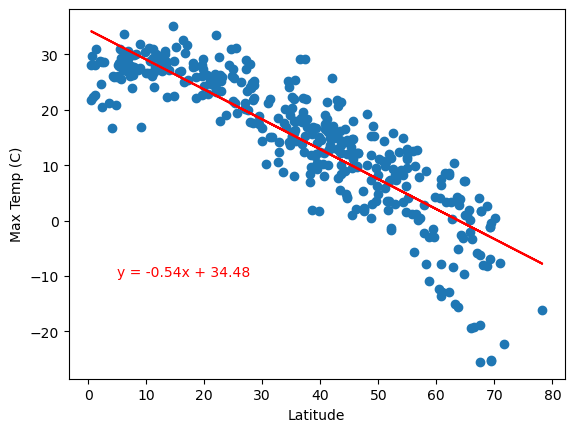

In [62]:
# Linear regression on Northern Hemisphere
func(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],5,-10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

The r-value is: 0.6806501749537373


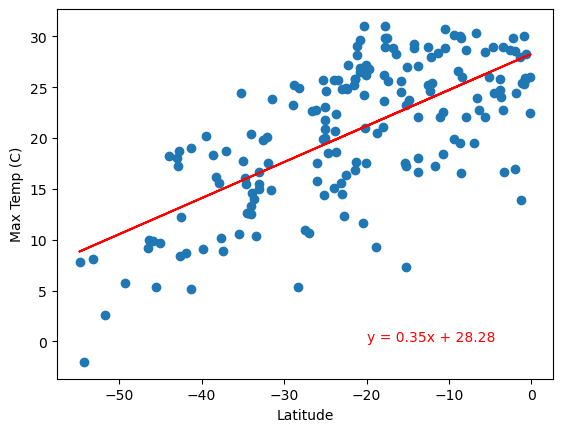

In [63]:
# Linear regression on Southern Hemisphere
func(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-20,0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.show()

**Discussion about the linear relationship:**<br>The regression lines on the above plots show how the temperature changes when the latitude is changed by a particular amount.<br>
For the Northern hemisphere, the r-value is negative so that's a negative co-relation. The r-value is also significant enough to conclude the following -<br>
As the latitude increases (from Equator to North Pole), max temperature observed would decrease.<br>
For the Southern hemisphere, the r-value is positive so that's a positive co-relation. The r-value is also significant enough to conclude the following -<br>
As the latitude increases (from South Pole to Equator), max temperature observed would increase.<br>
<br>
In other words, we can say that as you move away from the Equator and towards the poles, the temperature drops.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22602296362138094


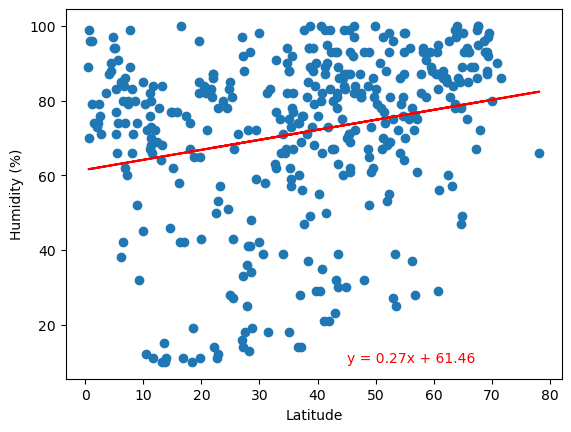

In [64]:
# Northern Hemisphere
func(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],45,10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.24974480654083483


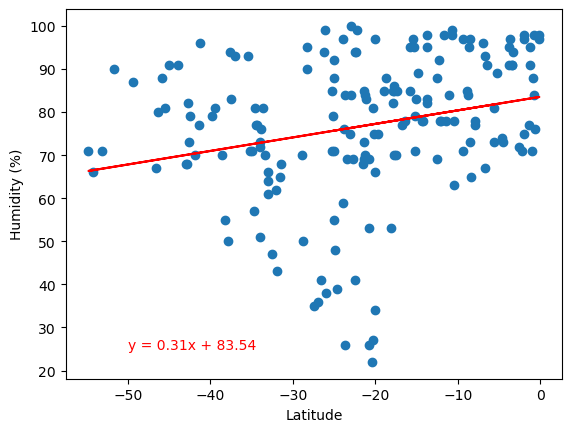

In [66]:
# Southern Hemisphere
func(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-50,25)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:**<br>The regression lines on the above plots show how the percentage of humidity changes when the latitude is changed by a particular amount.<br>
For the Northern hemisphere, the r-value is positive so that's a positive co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
For the Southern hemisphere, the r-value is positive so that's a positive co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
<br>
In other words, we can say that humidity does not majorly depend on the latitude position of the observation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11688268216607822


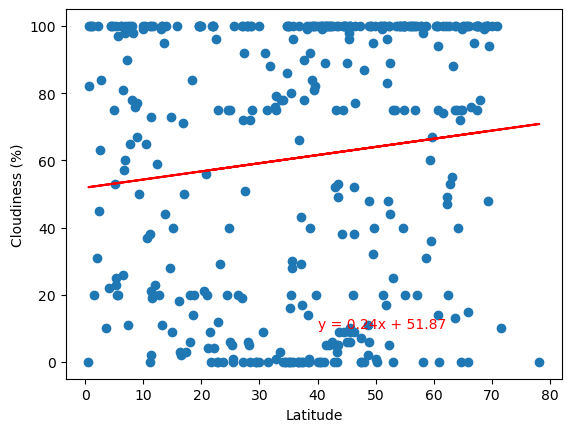

In [69]:
# Northern Hemisphere
func(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],40,10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.17491330430567165


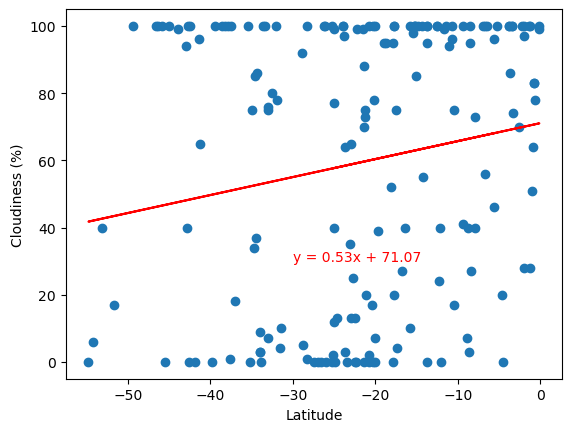

In [70]:
# Southern Hemisphere
func(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-30,30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**<br>The regression lines on the above plots show how the percentage of cloudiness changes when the latitude is changed by a particular amount.<br>
For the Northern hemisphere, the r-value is positive so that's a positive co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
For the Southern hemisphere, the r-value is positive so that's a positive co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
<br>
In other words, we can say that cloudiness does not majorly depend on the latitude position of the observation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.19563328911222228


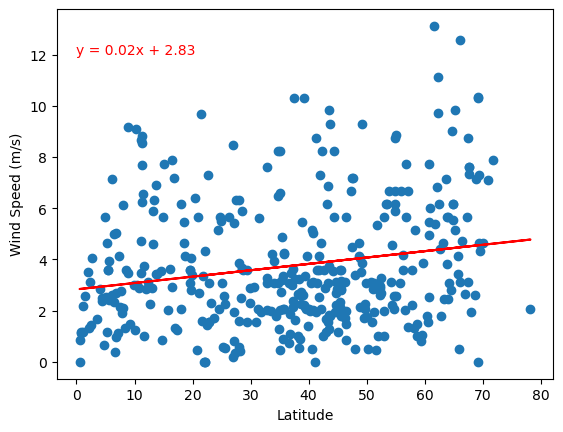

In [72]:
# Northern Hemisphere
func(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],0,12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.32082427246684103


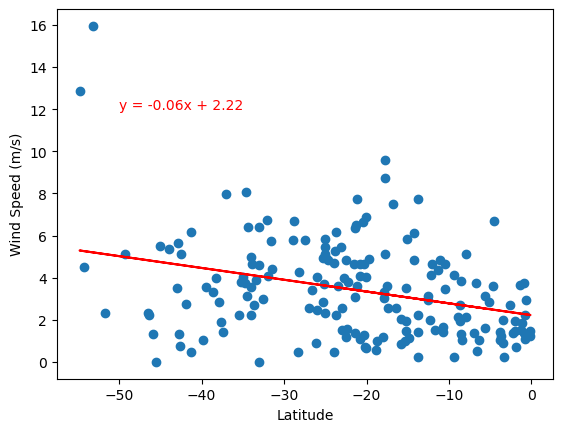

In [73]:
# Southern Hemisphere
func(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-50,12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:**<br>The regression lines on the above plots show how the wind speed changes when the latitude is changed by a particular amount.<br>
For the Northern hemisphere, the r-value is positive so that's a positive co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
For the Southern hemisphere, the r-value is negative so that's a negative co-relation. But because the r-value is not significant, we can say the co-relation is weak. <br>
<br>
In other words, we can say that wind speed does not majorly depend on the latitude position of the observation.